In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("IMDbMoviesIndia.csv",encoding='latin1')
df.head(39)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
df.shape

(15509, 10)

In [4]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

## Data Pre-processing

In [10]:
df['Year']

1        (2019)
3        (2019)
5        (1997)
6        (2005)
8        (2012)
          ...  
15493    (2015)
15494    (2001)
15503    (1989)
15505    (1999)
15508    (1998)
Name: Year, Length: 5659, dtype: object

In [11]:
#Replacing brackets from Year column
df['Year']=df['Year'].str.replace(r'[()]','',regex=True).astype(int)

In [12]:
df['Year']

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15493    2015
15494    2001
15503    1989
15505    1999
15508    1998
Name: Year, Length: 5659, dtype: int32

In [13]:
#Replacing min word from duration
df['Duration']=pd.to_numeric(df['Duration'].str.replace('min',''))

In [14]:
df['Duration']

1        109
3        110
5        147
6        142
8         82
        ... 
15493    115
15494    153
15503    125
15505    129
15508    130
Name: Duration, Length: 5659, dtype: int64

In [15]:
df.head(17)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [16]:
#Splitting the genre separated by ","  and deleting the null values
df['Genre']=df['Genre'].str.split(',')
df=df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15280\909828699.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)


In [17]:
#Converting votes to all numeric by replacing "," with " "
df['Votes']=pd.to_numeric(df['Votes'].str.replace(',',''))

In [18]:
df['Votes'].head(10)

1       8
3      35
3      35
5     827
5     827
5     827
6    1086
6    1086
6    1086
8     326
Name: Votes, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int32  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 982.7+ KB


## Data Visualization

In [20]:
df['Year'].head()

1    2019
3    2019
3    2019
5    1997
5    1997
Name: Year, dtype: int32

                                 Name  Year  Duration     Genre  Rating  \
1  #Gadhvi (He thought he was Gandhi)  2019       109     Drama     7.0   
3                             #Yaaram  2019       110    Comedy     4.4   
3                             #Yaaram  2019       110   Romance     4.4   
5                ...Aur Pyaar Ho Gaya  1997       147    Comedy     4.7   
5                ...Aur Pyaar Ho Gaya  1997       147     Drama     4.7   

   Votes       Director       Actor 1                 Actor 2          Actor 3  
1      8  Gaurav Bakshi  Rasika Dugal          Vivek Ghamande    Arvind Jangid  
3     35     Ovais Khan       Prateik              Ishita Raj  Siddhant Kapoor  
3     35     Ovais Khan       Prateik              Ishita Raj  Siddhant Kapoor  
5    827   Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
5    827   Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  


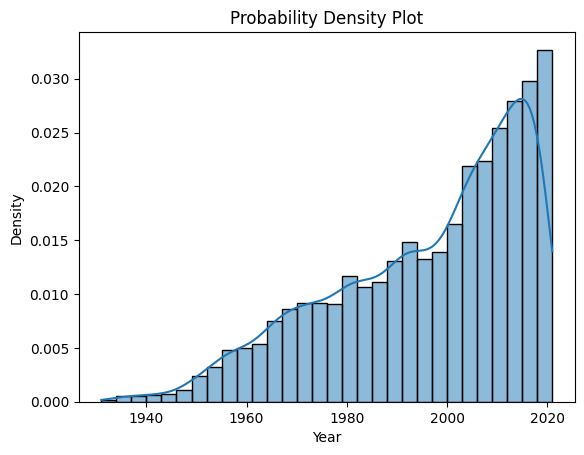

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verify DataFrame
print(df.head())

# Create a Probability Density Plot using seaborn
sns.histplot(df['Year'], kde=True, stat='density', bins=30)

# Customize the plot
plt.title('Probability Density Plot')
plt.xlabel('Year')
plt.ylabel('Density')

# Show the plot
plt.show()


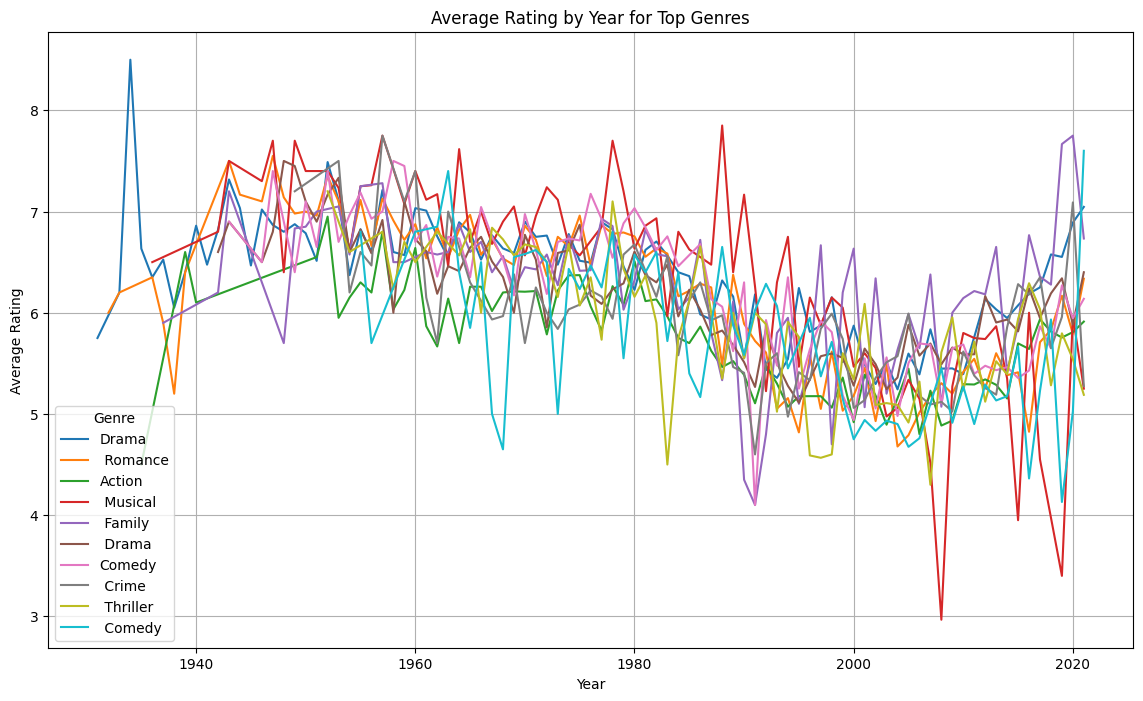

In [22]:
# Group data by Year and Genre and calculate the average rating
avg_rating_by_year = df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 10 genres
top_genres = df['Genre'].value_counts().head(10).index

# Filter the data to include only the top 3 genres
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

# Plot using seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_rating_by_year, x='Year', y='Rating', hue='Genre')

# Customize the plot
plt.title('Average Rating by Year for Top Genres')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre')
plt.grid(True)

# Show the plot
plt.show()

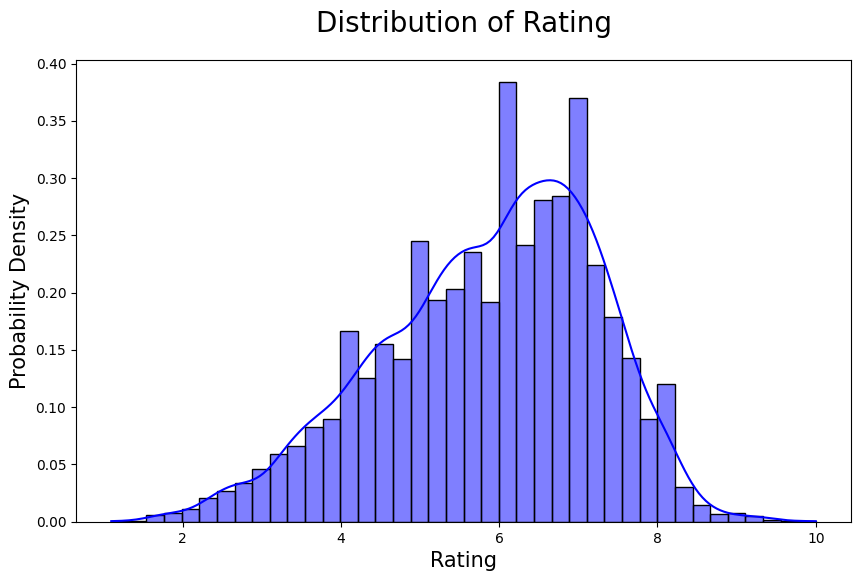

In [23]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, stat='density', bins=40, color='blue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Rating', fontsize=20, pad=20)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Probability Density', fontsize=15)
plt.grid(False)
plt.gca().set_facecolor('white')
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)

# Show the plot
plt.show()

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [25]:
# Dropping Name column because it doesn't impact the outcome
df.drop('Name', axis = 1, inplace = True)

In [26]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [27]:
# Keeping the predictor and target variable

X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

In [28]:
# Splitting the dataset into training and testing parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

In [29]:
# Building machine learning model and training them
Model = LinearRegression()
Model.fit(X_train,y_train)
Model_pred = Model.predict(X_test)

In [30]:
# Evaluating the performance of model with evaluation metrics

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, Model_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, Model_pred))
print('R2 score: ',r2_score(y_test, Model_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.4463977880886111
Mean absolute error:  0.4921055068501123
R2 score:  0.7641906900948997


## Model Testing

In [31]:
X.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.248697,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.838423,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.838739,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.838423,5.335135,4.793617,5.73,5.93
5,1997,827,147,5.875793,5.335135,4.793617,5.73,5.93


In [32]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [33]:
# For testing, We create a new dataframe with values close to the any of our existing data to evaluate.

data = {'Year': [2019], 'Votes': [36], 'Duration': [111], 'Genre_mean_rating': [5.8], 'Director_encoded': [4.5], 'Actor1_encoded': [5.3], 'Actor2_encoded': [4.5], 'Actor3_encoded': [4.5]}
trail = pd.DataFrame(data)

In [34]:
# Predict the movie rating by entered data
rating_predicted = Model.predict(trail)

# Display the predicted result from the Model
print("Predicted Rating:", rating_predicted[0])

Predicted Rating: 4.207758858584072


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               11979 non-null  int32  
 1   Duration           11979 non-null  int64  
 2   Genre              11979 non-null  object 
 3   Rating             11979 non-null  float64
 4   Votes              11979 non-null  int64  
 5   Director           11979 non-null  object 
 6   Actor 1            11979 non-null  object 
 7   Actor 2            11979 non-null  object 
 8   Actor 3            11979 non-null  object 
 9   Genre_mean_rating  11979 non-null  float64
 10  Director_encoded   11979 non-null  float64
 11  Actor1_encoded     11979 non-null  float64
 12  Actor2_encoded     11979 non-null  float64
 13  Actor3_encoded     11979 non-null  float64
dtypes: float64(6), int32(1), int64(2), object(5)
memory usage: 1.3+ MB


In [35]:
#sending this dataframe to a new csv file
df.to_csv("MovieRatingPrediction01.csv")